In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import datetime
import statsmodels.api as sm

In [39]:
# Loads all the daily volatility data and merges them using the "DATE" into the "data" dataframe
data = pd.read_csv("C:/Users/Ivan/Desktop/ECON 5200 Paper/VIX.csv", parse_dates=True).\
    set_index("DATE")
new = pd.read_csv("C:/Users/Ivan/Desktop/ECON 5200 Paper/TNotes.csv", parse_dates=True).\
    set_index("DATE")
data = data.join(new)
new = pd.read_csv("C:/Users/Ivan/Desktop/ECON 5200 Paper/Oil.csv", parse_dates=True).\
    set_index("DATE")
data = data.join(new)

data.head()

,VIX,Tnotes,Oil
DATE,,,
1/2/2004,18.22,9.2,NaN
1/5/2004,17.49,9.02,NaN
1/6/2004,16.73,8.39,NaN
1/7/2004,15.5,8.21,NaN
1/8/2004,15.61,8.54,NaN


In [40]:
# Replaces dots "." with NaN and converts all values from string to float
data = data.replace('.', np.NaN)
data = data.astype(float)

In [41]:
# Calculates the average volatility for each month for each year and changes the index from MDY to MY
data["month"] = pd.to_datetime(data.index).month
data["year"] = pd.to_datetime(data.index).year
monthlydata = data.groupby(["year", "month"], as_index=False).mean()
monthlydata["DATE"] = pd.to_datetime(monthlydata[["year", "month"]].assign(day=1))
monthlydata.set_index("DATE", inplace=True)
monthlydata = monthlydata.drop(columns = ["month", "year"])
monthlydata.head()

,VIX,Tnotes,Oil
DATE,,,
2004-01-01,16.101000,8.420500,NaN
2004-02-01,15.998421,7.928947,NaN
2004-03-01,17.687391,7.695217,NaN
2004-04-01,15.698571,8.569048,NaN
2004-05-01,17.705000,8.476000,NaN


In [42]:
# Loads all the monthly consumption data and merges them by  matching the "DATE" and sets the index
# year month
data = pd.read_csv("C:/Users/Ivan/Desktop/ECON 5200 Paper/Real PCE.csv", parse_dates=True).\
    set_index("DATE")
new = pd.read_csv("C:/Users/Ivan/Desktop/ECON 5200 Paper/Durable PCE.csv", parse_dates=True).\
    set_index("DATE")
data = data.join(new)
new = pd.read_csv("C:/Users/Ivan/Desktop/ECON 5200 Paper/Nondurable PCE.csv", parse_dates=True).\
    set_index("DATE")
data = data.join(new)
new = pd.read_csv("C:/Users/Ivan/Desktop/ECON 5200 Paper/services.csv", parse_dates=True).\
    set_index("DATE")
data = data.join(new)
data["month"] = pd.to_datetime(data.index).month
data["year"] = pd.to_datetime(data.index).year
data["DATE"] = pd.to_datetime(data[["year", "month"]].assign(day=1))
data.set_index("DATE", inplace=True)
data = data.drop(columns = ["month", "year"])
data.head()

,PCE,Durable,Nondurable,services
DATE,,,,
2003-01-01,9219.1,833.2,2191.0,6234.2
2003-02-01,9186.3,813.4,2193.9,6226.6
2003-03-01,9241.2,839.3,2205.1,6234.1
2003-04-01,9287.2,858.1,2206.8,6252.4
2003-05-01,9308.5,865.1,2203.1,6267.4


In [43]:
# Merges the volatility data (monthlydata) and the consumption data (data)
monthlydata = monthlydata.join(data)
monthlydata.dropna(inplace=True)
monthlydata.head()

,VIX,Tnotes,Oil,PCE,Durable,Nondurable,services
DATE,,,,,,,
2007-05-01,13.297727,3.968182,26.642000,10587.6,1105.2,2497.8,6974.0
2007-06-01,14.947619,5.006667,27.002857,10582.9,1087.1,2502.5,6986.4
2007-07-01,17.273333,5.420000,27.720000,10612.1,1092.9,2516.3,6995.7
2007-08-01,25.026087,6.758261,30.717391,10653.6,1108.8,2498.9,7035.5
2007-09-01,22.198947,6.806842,29.850000,10661.7,1119.7,2504.3,7025.8


In [44]:
monthlydata = monthlydata.pct_change()
monthlydata = monthlydata * 100
monthlydata = monthlydata.dropna()
monthlydata.head()

,VIX,Tnotes,Oil,PCE,Durable,Nondurable,services
DATE,,,,,,,
2007-06-01,12.407321,26.170294,1.354467,-0.044392,-1.637713,0.188166,0.177803
2007-07-01,15.559095,8.255659,2.655804,0.275917,0.533530,0.551449,0.133116
2007-08-01,44.882788,24.691160,10.813100,0.391063,1.454845,-0.691491,0.568921
2007-09-01,-11.296770,0.718842,-2.823779,0.076031,0.983045,0.216095,-0.137872
2007-10-01,-13.889376,-16.652491,4.859078,0.014069,0.544789,-0.335423,0.038430


In [45]:
monthlydata["year"] = pd.to_datetime(monthlydata.index).year
year = pd.get_dummies(monthlydata.year, prefix = "year")
monthlydata = monthlydata.join(year)
monthlydata.head()

,VIX,Tnotes,Oil,PCE,Durable,Nondurable,services,year,year_2007,year_2008,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
DATE,,,,,,,,,,,,,,,,,,,,,
2007-06-01,12.407321,26.170294,1.354467,-0.044392,-1.637713,0.188166,0.177803,2007,1,0,...,0,0,0,0,0,0,0,0,0,0
2007-07-01,15.559095,8.255659,2.655804,0.275917,0.533530,0.551449,0.133116,2007,1,0,...,0,0,0,0,0,0,0,0,0,0
2007-08-01,44.882788,24.691160,10.813100,0.391063,1.454845,-0.691491,0.568921,2007,1,0,...,0,0,0,0,0,0,0,0,0,0
2007-09-01,-11.296770,0.718842,-2.823779,0.076031,0.983045,0.216095,-0.137872,2007,1,0,...,0,0,0,0,0,0,0,0,0,0
2007-10-01,-13.889376,-16.652491,4.859078,0.014069,0.544789,-0.335423,0.038430,2007,1,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Gives the summary statistics for all the variables
monthlydata.describe().transpose()
#monthlydata.describe().transpose().to_csv("Summary Statistics.csv")

,count,mean,std,min,25%,50%,75%,max
VIX,153.0,2.136902,21.713086,-31.125868,-10.678323,-1.931097,7.773208,103.073253
Tnotes,153.0,0.857992,12.334979,-21.856049,-7.033371,-1.289093,8.063238,40.129981
Oil,153.0,1.247664,14.812801,-29.951636,-7.633606,-1.597077,7.747423,58.118178
PCE,153.0,0.157307,0.277722,-0.944621,0.020698,0.184062,0.335287,0.919844
Durable,153.0,0.335559,1.522344,-8.845279,-0.233340,0.422665,1.011661,7.118919
Nondurable,153.0,0.126947,0.527116,-1.905758,-0.212886,0.165570,0.465619,1.760539
services,153.0,0.142927,0.187473,-0.365859,0.014187,0.169093,0.269930,0.668195
year,153.0,2013.287582,3.707519,2007.000000,2010.000000,2013.000000,2016.000000,2020.000000
year_2007,153.0,0.045752,0.209632,0.000000,0.000000,0.000000,0.000000,1.000000
year_2008,153.0,0.078431,0.269732,0.000000,0.000000,0.000000,0.000000,1.000000


In [47]:
monthlydata.median()

VIX             -1.931097
Tnotes          -1.289093
Oil             -1.597077
PCE              0.184062
Durable          0.422665
Nondurable       0.165570
services         0.169093
year          2013.000000
year_2007        0.000000
year_2008        0.000000
year_2009        0.000000
year_2010        0.000000
year_2011        0.000000
year_2012        0.000000
year_2013        0.000000
year_2014        0.000000
year_2015        0.000000
year_2016        0.000000
year_2017        0.000000
year_2018        0.000000
year_2019        0.000000
year_2020        0.000000
dtype: float64

In [48]:
unitroot = adfuller(monthlydata.VIX)
print("ADF Statistic: %f" % unitroot[0])
print("p-value: %f" % unitroot[1])

ADF Statistic: -12.181785
p-value: 0.000000


In [49]:
unitroot = adfuller(monthlydata.Tnotes)
print("ADF Statistic: %f" % unitroot[0])
print("p-value: %f" % unitroot[1])

ADF Statistic: -10.711591
p-value: 0.000000


In [50]:
unitroot = adfuller(monthlydata.Oil)
print("ADF Statistic: %f" % unitroot[0])
print("p-value: %f" % unitroot[1])

ADF Statistic: -10.842304
p-value: 0.000000


In [51]:
unitroot = adfuller(monthlydata.PCE)
print("ADF Statistic: %f" % unitroot[0])
print("p-value: %f" % unitroot[1])

ADF Statistic: -2.522288
p-value: 0.110145


In [52]:
unitroot = adfuller(monthlydata.Durable)
print("ADF Statistic: %f" % unitroot[0])
print("p-value: %f" % unitroot[1])

ADF Statistic: -14.083166
p-value: 0.000000


In [53]:
unitroot = adfuller(monthlydata.Nondurable)
print("ADF Statistic: %f" % unitroot[0])
print("p-value: %f" % unitroot[1])

ADF Statistic: -6.443805
p-value: 0.000000


In [54]:
unitroot = adfuller(monthlydata.services)
print("ADF Statistic: %f" % unitroot[0])
print("p-value: %f" % unitroot[1])

ADF Statistic: -6.950015
p-value: 0.000000


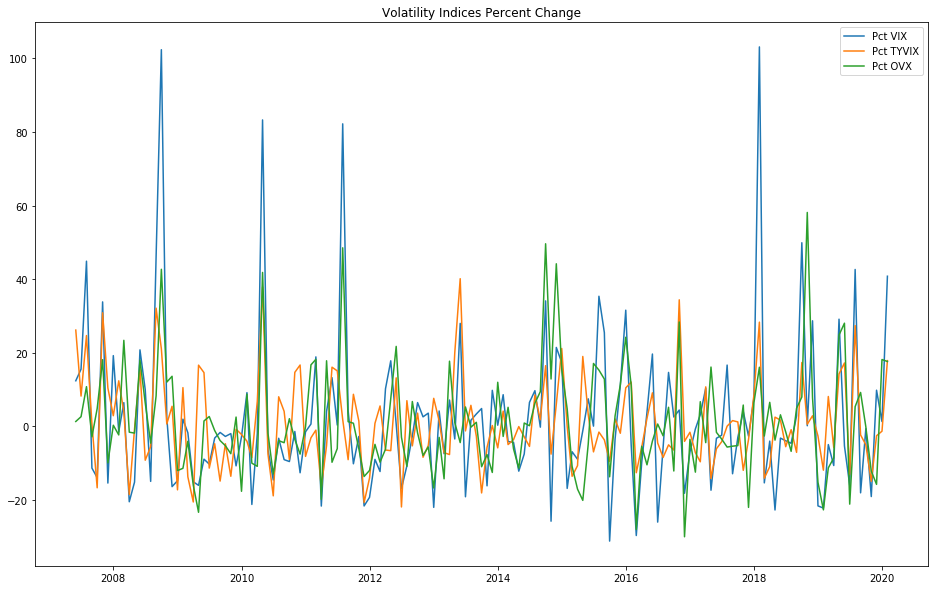

In [55]:
plt.figure(figsize=(16,10))
plt.title("Volatility Indices Percent Change")
sns.lineplot(data = monthlydata.VIX, label = "Pct VIX")
sns.lineplot(data = monthlydata.Tnotes, label = "Pct TYVIX")
sns.lineplot(data = monthlydata.Oil, label = "Pct OVX")

<Figure size 432x288 with 0 Axes>

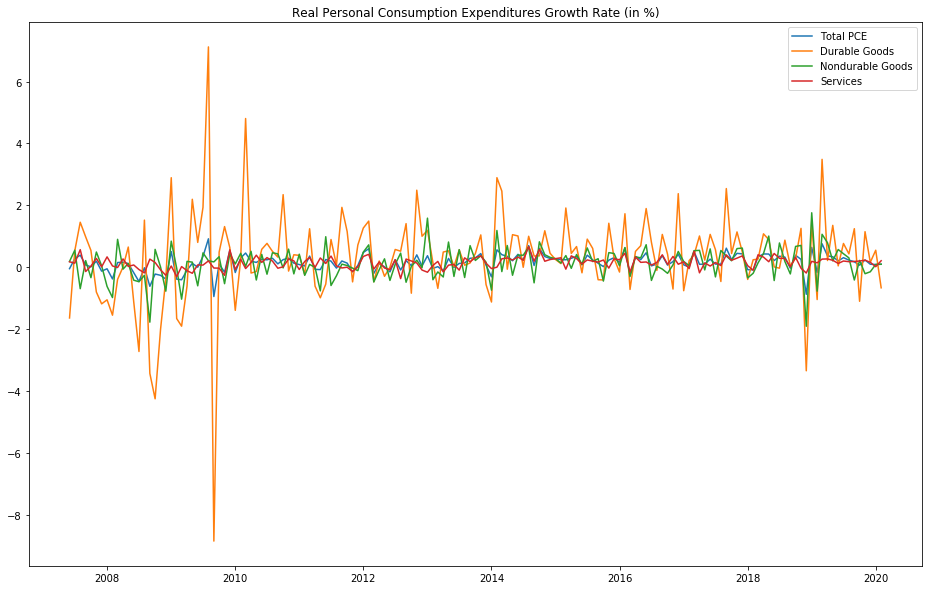

In [56]:
plt.clf()
plt.figure(figsize=(16,10))
plt.title("Real Personal Consumption Expenditures Growth Rate (in %)")
sns.lineplot(data = monthlydata.PCE, label = "Total PCE")
sns.lineplot(data = monthlydata.Durable, label = "Durable Goods")
sns.lineplot(data = monthlydata.Nondurable, label = "Nondurable Goods")
sns.lineplot(data = monthlydata.services, label = "Services")

In [57]:
pce = monthlydata.PCE
durable = monthlydata.Durable
nondurable = monthlydata.Nondurable
services = monthlydata.services

x1 = monthlydata[["VIX", "Tnotes", "Oil"]]
x2 = monthlydata[["VIX", "Tnotes", "Oil", "year_2007", "year_2008", "year_2009", "year_2010",\
                 "year_2011", "year_2012", "year_2013", "year_2014", "year_2015", "year_2016",\
                 "year_2017", "year_2018", "year_2019"]]

pce.head()
x2.head()

,VIX,Tnotes,Oil,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
DATE,,,,,,,,,,,,,,,,
2007-06-01,12.407321,26.170294,1.354467,1,0,0,0,0,0,0,0,0,0,0,0,0
2007-07-01,15.559095,8.255659,2.655804,1,0,0,0,0,0,0,0,0,0,0,0,0
2007-08-01,44.882788,24.691160,10.813100,1,0,0,0,0,0,0,0,0,0,0,0,0
2007-09-01,-11.296770,0.718842,-2.823779,1,0,0,0,0,0,0,0,0,0,0,0,0
2007-10-01,-13.889376,-16.652491,4.859078,1,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
x1 = sm.add_constant(x1)
x2 = sm.add_constant(x2)
x1.head()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,VIX,Tnotes,Oil
DATE,,,,
2007-06-01,1.0,12.407321,26.170294,1.354467
2007-07-01,1.0,15.559095,8.255659,2.655804
2007-08-01,1.0,44.882788,24.691160,10.813100
2007-09-01,1.0,-11.296770,0.718842,-2.823779
2007-10-01,1.0,-13.889376,-16.652491,4.859078


In [59]:
model = sm.OLS(pce, x1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    PCE   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.314
Date:                Fri, 17 Apr 2020   Prob (F-statistic):              0.272
Time:                        23:13:14   Log-Likelihood:                -18.585
No. Observations:                 153   AIC:                             45.17
Df Residuals:                     149   BIC:                             57.29
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1604      0.023      7.127      0.0

In [60]:
model = sm.OLS(pce, x2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    PCE   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     2.333
Date:                Fri, 17 Apr 2020   Prob (F-statistic):            0.00446
Time:                        23:13:22   Log-Likelihood:                -2.0259
No. Observations:                 153   AIC:                             38.05
Df Residuals:                     136   BIC:                             89.57
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0978      0.186      0.526      0.6

In [61]:
model = sm.OLS(durable, x1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Durable   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     3.664
Date:                Fri, 17 Apr 2020   Prob (F-statistic):             0.0138
Time:                        23:13:31   Log-Likelihood:                -275.45
No. Observations:                 153   AIC:                             558.9
Df Residuals:                     149   BIC:                             571.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3733      0.121      3.095      0.0

In [62]:
model = sm.OLS(durable, x2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Durable   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     1.599
Date:                Fri, 17 Apr 2020   Prob (F-statistic):             0.0769
Time:                        23:13:33   Log-Likelihood:                -267.71
No. Observations:                 153   AIC:                             569.4
Df Residuals:                     136   BIC:                             620.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2031      1.057      0.192      0.8

In [63]:
model = sm.OLS(nondurable, x1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Nondurable   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.7527
Date:                Fri, 17 Apr 2020   Prob (F-statistic):              0.522
Time:                        23:17:27   Log-Likelihood:                -117.47
No. Observations:                 153   AIC:                             242.9
Df Residuals:                     149   BIC:                             255.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1320      0.043      3.073      0.0

In [64]:
model = sm.OLS(nondurable, x2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Nondurable   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.038
Date:                Fri, 17 Apr 2020   Prob (F-statistic):              0.421
Time:                        23:17:36   Log-Likelihood:                -109.81
No. Observations:                 153   AIC:                             253.6
Df Residuals:                     136   BIC:                             305.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1115      0.376      0.296      0.7

In [65]:
model = sm.OLS(services, x1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               services   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.450
Date:                Fri, 17 Apr 2020   Prob (F-statistic):              0.231
Time:                        23:17:55   Log-Likelihood:                 41.746
No. Observations:                 153   AIC:                            -75.49
Df Residuals:                     149   BIC:                            -63.37
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1399      0.015      9.218      0.0

In [66]:
model = sm.OLS(services, x2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               services   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     1.622
Date:                Fri, 17 Apr 2020   Prob (F-statistic):             0.0708
Time:                        23:18:02   Log-Likelihood:                 52.907
No. Observations:                 153   AIC:                            -71.81
Df Residuals:                     136   BIC:                            -20.30
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0767      0.130      0.590      0.5